# World Happiness Prediction

## Importing Libraries

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


## Preparing Dataset

In [3]:
df_2015 = pd.read_csv("2015.csv")
df_2015


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df_2016 = pd.read_csv("2016.csv")
df_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [8]:
df_2016.shape

(157, 13)

In [5]:
df_2017 = pd.read_csv("2017.csv")
df_2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [9]:
df_2017.shape

(155, 12)

In [6]:
df_2018 = pd.read_csv("2018.csv")
df_2018.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [10]:
df_2018.shape

(156, 9)

In [7]:
df_2019 = pd.read_csv("2019.csv")
df_2019.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [11]:
df_2019.shape

(156, 9)

In [12]:
year_list=[df_2015,df_2016,df_2017,df_2018]
for i in year_list:
    print(i.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

In [16]:
df_2018["Country or region"].count()

156

In [17]:
df_2015.drop(["Standard Error","Dystopia Residual"],axis=1,inplace= True)

In [29]:
df_2015.drop(["Region"],axis=1,inplace= True)

In [30]:
df_2015.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [19]:
df_2016.drop(['Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'],axis=1,inplace= True)
df_2016.columns


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [31]:
df_2016.drop(["Region"],axis=1,inplace= True)

In [32]:
df_2016.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [21]:
#df_2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual'],axis=1,inplace = True)
df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.'],
      dtype='object')

In [27]:
df_2017.rename(columns={'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                        'Health..Life.Expectancy.':'Health (Life Expectancy)',
                        'Trust..Government.Corruption.':'Trust (Government Corruption)',
                        'Happiness.Rank':'Happiness Rank',
                        'Happiness.Score':'Happiness Score'},inplace= True)


In [28]:
df_2017=df_2017[['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]
df_2017.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [33]:
df_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [34]:
df_2018.rename(columns={'Overall rank':'Happiness Rank',
                        'Country or region':'Country',
                        'Score':'Happiness Score',
                        'GDP per capita':'Economy (GDP per Capita)',
                        'Social support':'Family',
                        'Healthy life expectancy':'Health (Life Expectancy)',
                        'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)',
                        },inplace= True)

In [39]:
df_2018=df_2018[['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]


In [40]:
df_2018.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [41]:
df_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [42]:
df_2019.rename(columns={'Overall rank':'Happiness Rank',
                        'Country or region':'Country',
                        'Score':'Happiness Score',
                        'GDP per capita':'Economy (GDP per Capita)',
                        'Social support':'Family',
                        'Healthy life expectancy':'Health (Life Expectancy)',
                        'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)',
                        },inplace= True)

df_2019=df_2019[['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]

In [44]:
df_2019.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

## Final Dataset for Training the Model

In [138]:
data=pd.concat([df_2015,df_2016,df_2017,df_2018],axis=0,ignore_index= True)
data


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
621,Yemen,152,3.355,0.44200,1.07300,0.34300,0.24400,0.06400,0.08300
622,Tanzania,153,3.303,0.45500,0.99100,0.38100,0.48100,0.09700,0.27000
623,South Sudan,154,3.254,0.33700,0.60800,0.17700,0.11200,0.10600,0.22400
624,Central African Republic,155,3.083,0.02400,0.00000,0.01000,0.30500,0.03800,0.21800


## Exploratory Data analysis

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        626 non-null    object 
 1   Happiness Rank                 626 non-null    int64  
 2   Happiness Score                626 non-null    float64
 3   Economy (GDP per Capita)       626 non-null    float64
 4   Family                         626 non-null    float64
 5   Health (Life Expectancy)       626 non-null    float64
 6   Freedom                        626 non-null    float64
 7   Trust (Government Corruption)  625 non-null    float64
 8   Generosity                     626 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 48.9+ KB


In [57]:
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

In [62]:
d_rank=data[data["Happiness Rank"]==1]
d_rank

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780
0,Denmark,1,7.526,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
0,Finland,1,7.632,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000


<AxesSubplot:>

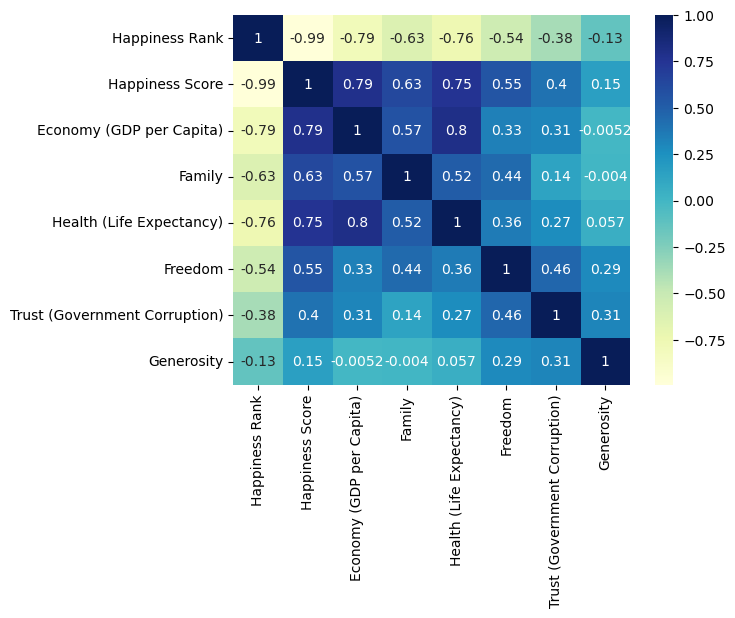

In [65]:
sns.heatmap(data.corr(), cmap="YlGnBu",annot = True)

# As we see happiness score is highly correlated to Economy,Family,Health

In [71]:
df_low_rank=data[data["Happiness Rank"]>=150]
df_low_rank

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
149,Guinea,150,3.656,0.174170,0.464750,0.240090,0.377250,0.121390,0.286570
150,Ivory Coast,151,3.655,0.465340,0.771150,0.151850,0.468660,0.179220,0.201650
151,Burkina Faso,152,3.587,0.258120,0.851880,0.271250,0.394930,0.128320,0.217470
152,Afghanistan,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100
153,Rwanda,154,3.465,0.222080,0.773700,0.428640,0.592010,0.551910,0.226280
154,Benin,155,3.340,0.286650,0.353860,0.319100,0.484500,0.080100,0.182600
155,Syria,156,3.006,0.663200,0.474890,0.721930,0.156840,0.189060,0.471790
156,Burundi,157,2.905,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270
157,Togo,158,2.839,0.208680,0.139950,0.284430,0.364530,0.107310,0.166810
149,Liberia,150,3.622,0.107060,0.503530,0.231650,0.257480,0.048520,0.240630


In [80]:
df_low_rank["Country"].unique()

array(['Guinea', 'Ivory Coast', 'Burkina Faso', 'Afghanistan', 'Rwanda',
       'Benin', 'Syria', 'Burundi', 'Togo', 'Liberia', 'Tanzania',
       'Central African Republic', 'Yemen', 'South Sudan'], dtype=object)

## These are the countries that having low happiness rank

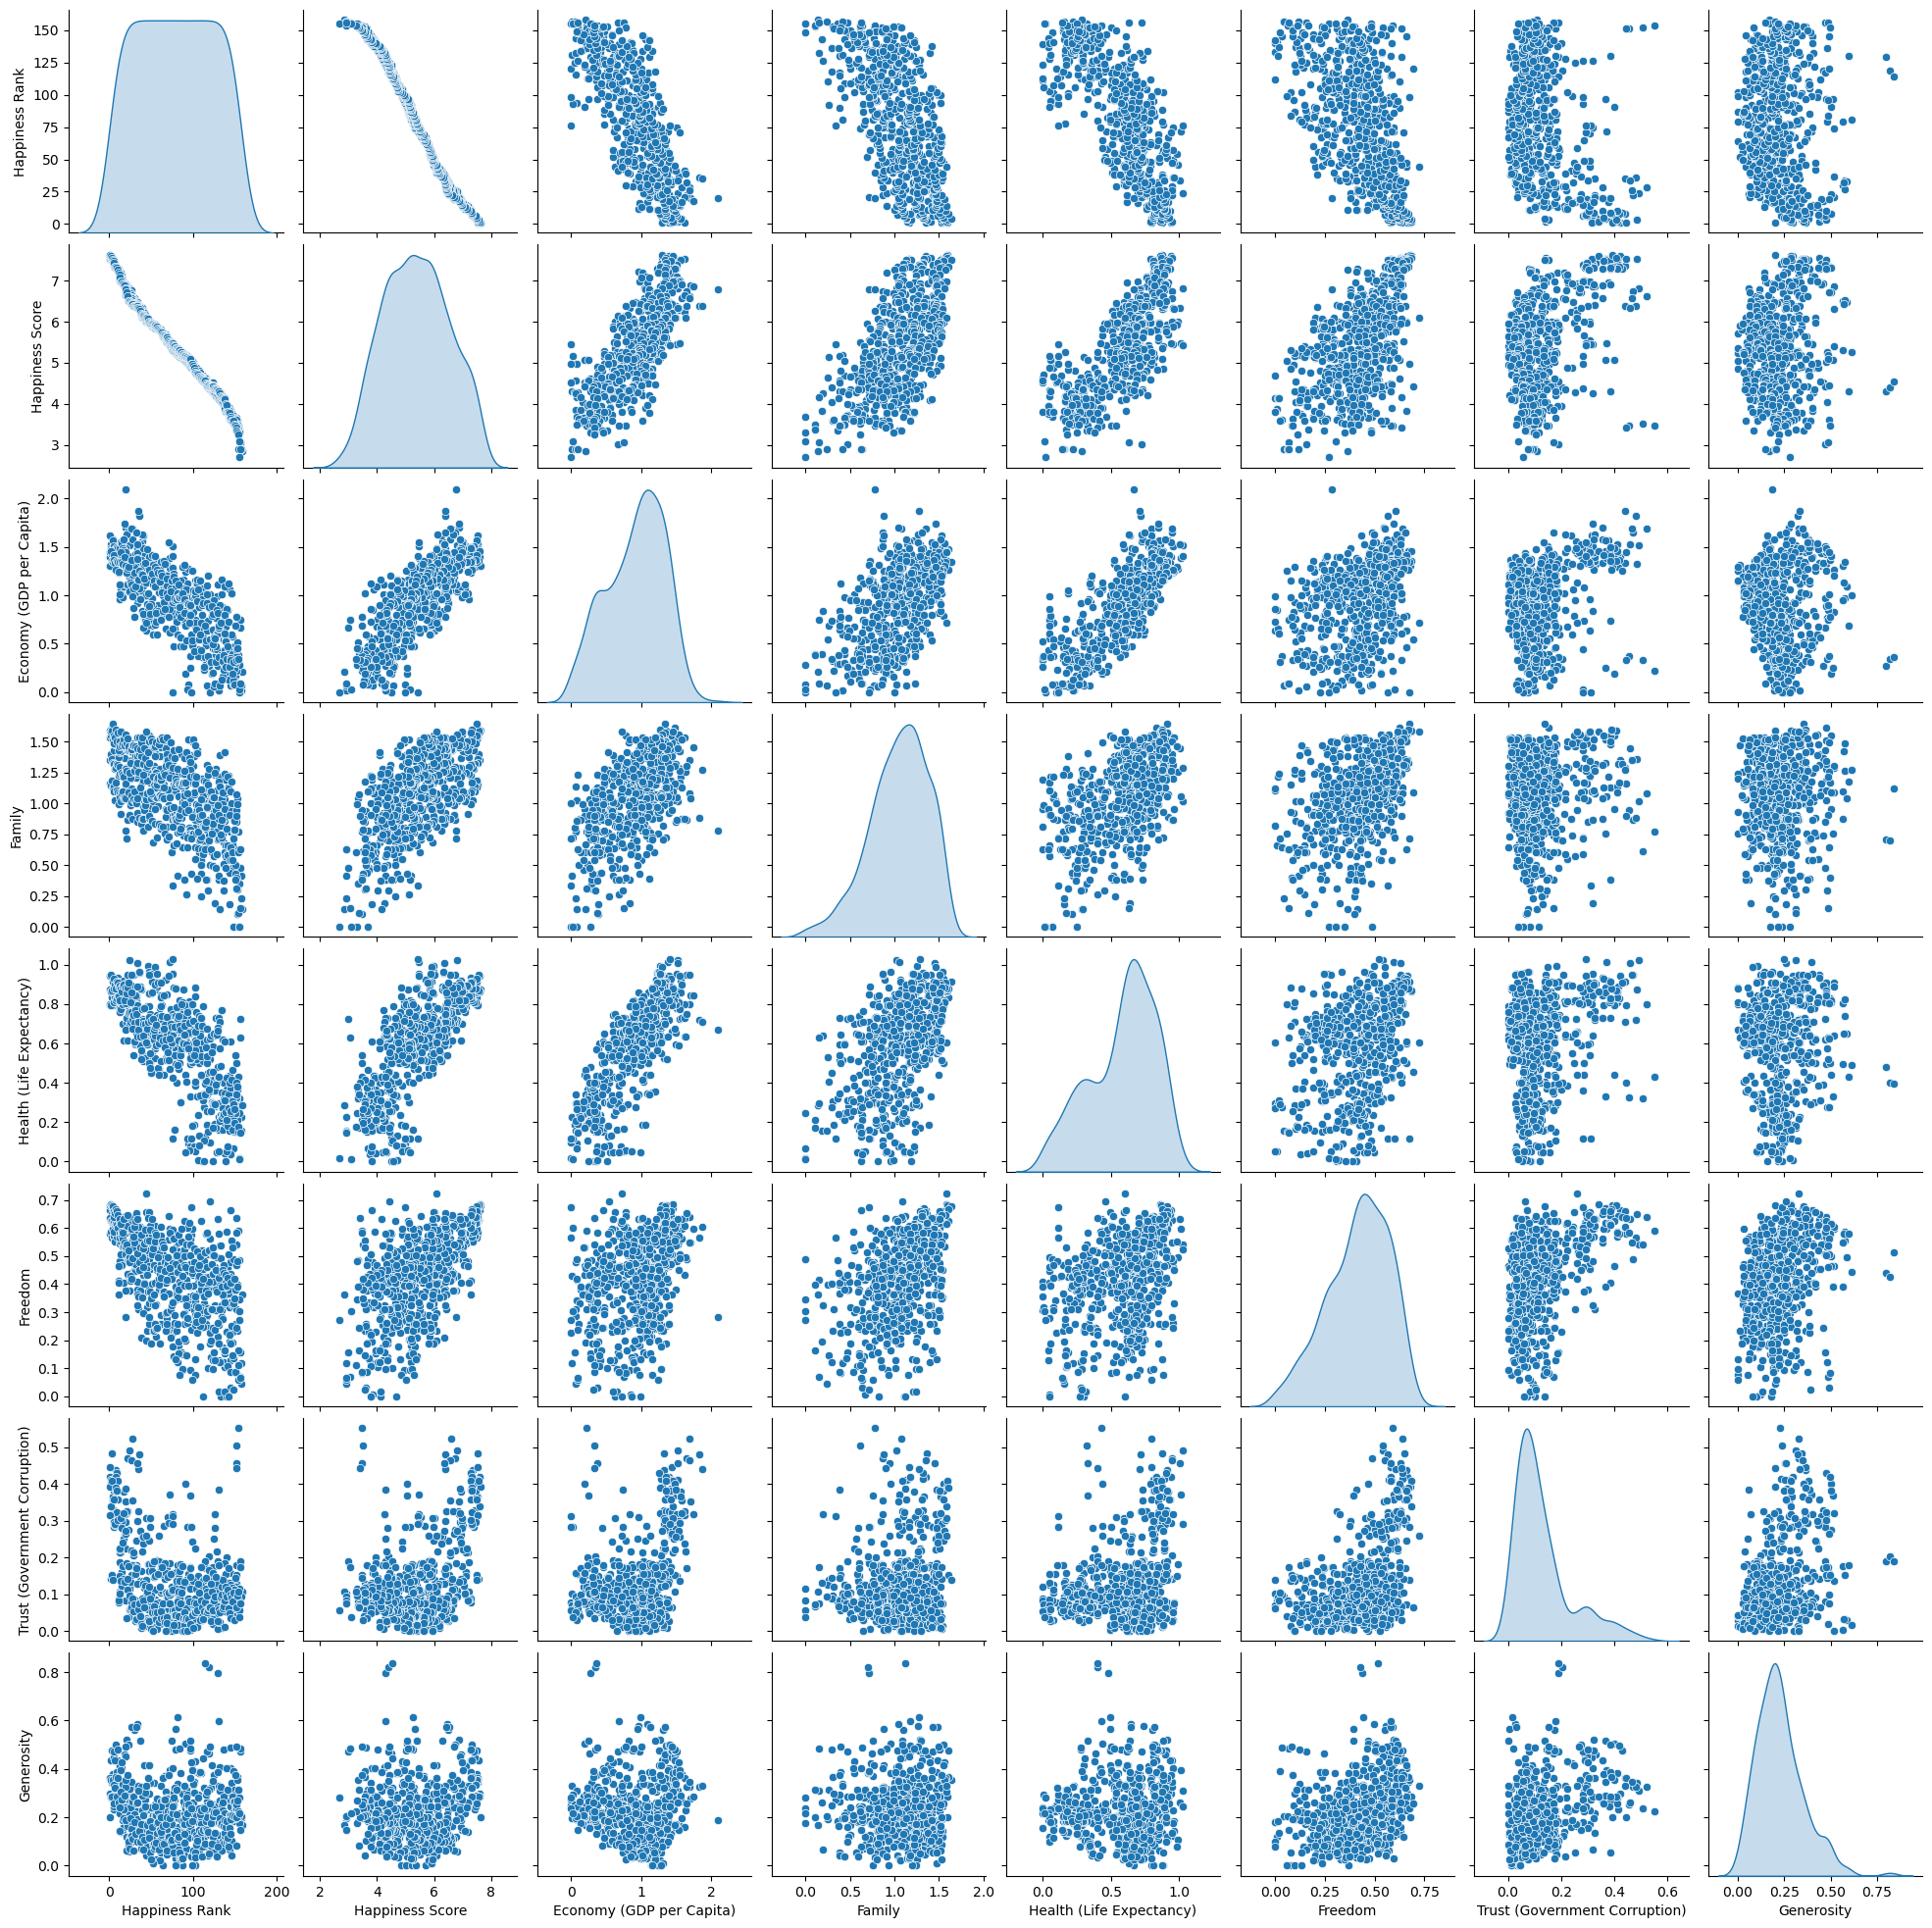

In [90]:
sns.pairplot(data,diag_kind="kde")

## Data Preproceesing

In [106]:
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

In [139]:
data= data.fillna(method="bfill")

In [143]:
X=data.drop(["Country","Happiness Score","Happiness Rank"],axis =1)
y=data["Happiness Score"]

In [149]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state = 2)

## Training The Model

### LinearRegression

In [150]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_train)
print("lr R2 Score :", r2_score(y_train,y_pred))
print("lr MSE :", mean_squared_error(y_train,y_pred))


lr R2 Score : 0.7686654792524142
lr MSE : 0.29427842258076325


### DecisionTreeRegressor

In [154]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_train)
print("lr R2 Score :", r2_score(y_train,y_pred))
print("lr MSE :", mean_squared_error(y_train,y_pred))


lr R2 Score : 1.0
lr MSE : 6.817936130763946e-17


### GradientBoostingRegressor

In [156]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_train)
print("lr R2 Score :", r2_score(y_train,y_pred))
print("lr MSE :", mean_squared_error(y_train,y_pred))


lr R2 Score : 0.9290780179153262
lr MSE : 0.09021917242066775


### RandomForestRegressor

In [158]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_train)
print("lr R2 Score :", r2_score(y_train,y_pred))
print("lr MSE :", mean_squared_error(y_train,y_pred))


lr R2 Score : 0.9738050107396169
lr MSE : 0.033322394315185834


## HyperParameter Tuning

### RandomForest Tuning

In [165]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

In [171]:
tuned_rfr = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
tuned_rfr.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [172]:
tuned_rfr.best_params_

{'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [173]:
tuned_rfr.best_score_

0.8017251837809153

### GradientBoosting Tuning

In [198]:
param_grid1 ={'n_estimators':[200,300,500],
              'learning_rate':[.001,0.01,.1],
              'max_depth':[1,2,4],
              'subsample':[.5,.75,1],
              'random_state':[1]
             }

In [204]:
tuned_gbr = GridSearchCV(estimator=gbr,param_grid=param_grid1,n_jobs=1,cv=3)
tuned_gbr.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [200, 300, 500], 'random_state': [1],
                         'subsample': [0.5, 0.75, 1]})

In [205]:
tuned_gbr.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 500,
 'random_state': 1,
 'subsample': 0.75}

In [206]:
tuned_gbr.best_score_

0.8083526327994695

## validation Prediction 

In [159]:
y_test_pred = lr.predict(X_test)
print("lr R2 Score :", r2_score(y_test,y_test_pred))
print("lr MSE :", mean_squared_error(y_test,y_test_pred))


lr R2 Score : 0.7463080790145229
lr MSE : 0.33106951759221276


In [160]:
y_test_pred = dtr.predict(X_test)
print("lr R2 Score :", r2_score(y_test,y_test_pred))
print("lr MSE :", mean_squared_error(y_test,y_test_pred))


lr R2 Score : 0.5930027357026647
lr MSE : 0.531133933744712


In [162]:
y_test_pred = gbr.predict(X_test)
print("lr R2 Score :", r2_score(y_test,y_test_pred))
print("lr MSE :", mean_squared_error(y_test,y_test_pred))


lr R2 Score : 0.7510479896851862
lr MSE : 0.3248839050071888


In [164]:
y_test_pred = rfr.predict(X_test)
print("lr R2 Score :", r2_score(y_test,y_test_pred))
print("lr MSE :", mean_squared_error(y_test,y_test_pred))


lr R2 Score : 0.7826190655385399
lr MSE : 0.2836834567941164


## Validate Prediction After Tunning

In [210]:
rfr =RandomForestRegressor(max_depth= 90,
                           max_features= 3,
                           min_samples_leaf= 3,
                           min_samples_split= 8,
                           n_estimators= 300)
rfr.fit(X_train,y_train)
y_test_pred = rfr.predict(X_test)
print("lr R2 Score :", r2_score(y_test,y_test_pred))
print("lr MSE :", mean_squared_error(y_test,y_test_pred))

lr R2 Score : 0.7737588350486811
lr MSE : 0.295246112091292


In [211]:
gbr = GradientBoostingRegressor(learning_rate= 0.01,
                                max_depth= 4,
                                n_estimators= 500,
                                random_state= 1,
                                subsample= 0.75)
gbr.fit(X_train,y_train)
y_test_pred = gbr.predict(X_test)
print("lr R2 Score :", r2_score(y_test,y_test_pred))
print("lr MSE :", mean_squared_error(y_test,y_test_pred))

lr R2 Score : 0.7644155495468814
lr MSE : 0.30743915715079234


#### So for RFR gives the best result,
#### Train score of RFR is 80%
#### Validation score of RFR is 77%

## Test Prediction With 2019 Dataset

In [213]:
X_test1=df_2019.drop(["Country","Happiness Rank","Happiness Score"],axis =1)
y_test1=df_2019["Happiness Score"]

### GradientBoostingRegressor

In [214]:
y_test_pred1 = gbr.predict(X_test1)
print("lr R2 Score :", r2_score(y_test1,y_test_pred1))
print("lr MSE :", mean_squared_error(y_test1,y_test_pred1))

lr R2 Score : 0.6477863026294647
lr MSE : 0.4336079247117962


### RandomForestRegressor

In [215]:
y_test_pred1 = rfr.predict(X_test1)
print("lr R2 Score :", r2_score(y_test1,y_test_pred1))
print("lr MSE :", mean_squared_error(y_test1,y_test_pred1))

lr R2 Score : 0.7308976000650222
lr MSE : 0.3312901628809023


#### From the above score Random Forest Regressor gives best prediction in the unseen dataset of 2019 with score of 73% accuracy